**Regression of Food Production(Paddy) production in Indonesia**

1. Kind of Food Production : Paddy
2. Region Production     : Central Java 

## Import relevant modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%tensorflow_version 2.x
import tensorflow as tf



UsageError: Line magic function `%tensorflow_version` not found.


## Load Dataset

### Select Central Java Paddy production to make regression

Note : Production values in ton( weight unit of measure)

In [2]:
data_paddy = pd.read_csv('data/padi.csv')
data_paddy_central_java = data_paddy[data_paddy['Provinsi']=="DI YOGYAKARTA"]
data_paddy_central_java = data_paddy_central_java.drop(columns='Provinsi')
data_paddy_central_java = data_paddy_central_java.T
data_paddy_central_java = data_paddy_central_java.reset_index()
data_paddy_central_java = data_paddy_central_java.rename(columns={"index":"Years",13:"Comodition_in_Ton"})
data_paddy_central_java = data_paddy_central_java[['Years', 'Comodition_in_Ton']].apply(pd.to_numeric)
data_paddy_central_java.head()

,Years,Comodition_in_Ton
0,1993,644642
1,1994,643266
2,1995,642120
3,1996,661179
4,1997,647198


In [3]:
data = pd.read_csv('data/preprocessed.csv')
data.drop(data.columns[0], axis=True, inplace=True)
data.iloc[:, :3]

,0,1,2
0,644642,643266,642120
1,643266,642120,661179
2,642120,661179,647198
3,661179,647198,621605
4,647198,621605,612393
5,621605,612393,654289
6,612393,654289,661802
7,654289,661802,653577
8,661802,653577,652280
9,653577,652280,692998


# Modeling
using feature from 1993 until 2013 to make model, will try to predict values at 2013, 2014, and 2015.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :3].values, data.iloc[:, -1].values, test_size=0.14, random_state=42,shuffle=False)

In [5]:
model = Ridge()
# model = Lasso()

model.fit(X_train,y_train)
result = model.predict(X_test)
result_rounded = [round(num, 1) for num in result]

# result_and_real = pd.concat(X_test,result,y_test)
# result_and_real

print('r2: ', round(r2_score(y_test, result),3))
print('mse: ', round(mean_squared_error(y_test, result),3))
# print('rmse: ', round(mean_squared_error(y_test, result, squared=False),3))

r2:  -43.521
mse:  5945921439.154


In [6]:
Real_n_result = pd.DataFrame(list(zip(X_test.tolist(), result_rounded, y_test.tolist())), 
               columns =['Data', 'Prediction','Actual'])

Real_n_result

,Data,Prediction,Actual
0,"[823887, 842934, 946224]",999893.1,921824
1,"[842934, 946224, 921824]",978476.3,919573
2,"[946224, 921824, 919573]",1036094.1,945136


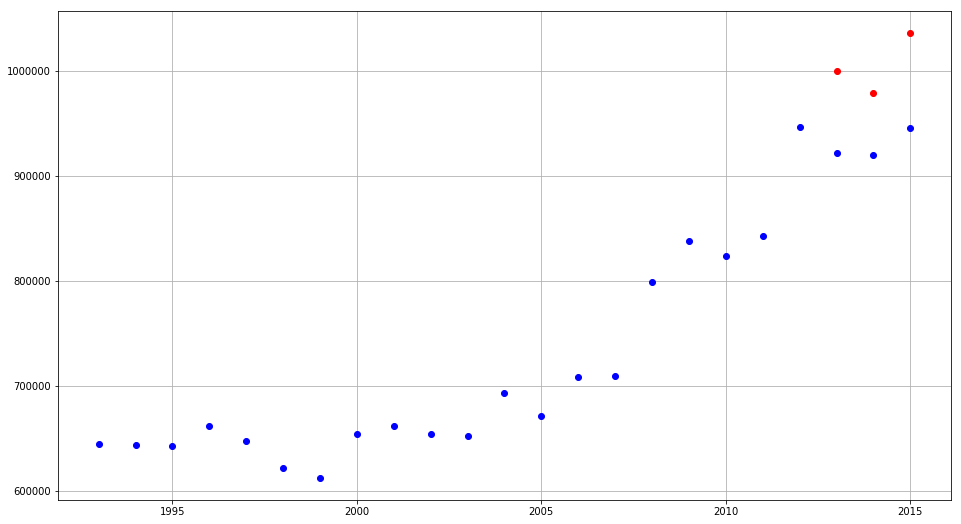

In [7]:
pred = data_paddy_central_java.rename(columns={"Comodition_in_Ton":'predict'}).iloc[-3:, :]
pred['predict'] = result_rounded
fig = plt.figure(figsize=(16,9))
plt.grid()
plt.plot(data_paddy_central_java['Years'], 
         data_paddy_central_java['Comodition_in_Ton'], 
#          kind='scatter',
         'bo')

plt.plot(pred['Years'], 
         pred['predict'], 
#          kind='scatter',
         'ro')

plt.show()